# Simple Plot - Event - Gyro_09022020-1555

# Measurement Data
* Gyro

# Import modules

In [73]:
from datetime import datetime, timedelta
import pandas as pd
#%matplotlib inline
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Constants relevant for the graphs:

In [74]:
colors=['violet','darkgreen','black','red','blue','pink']
#colors=['b','g','k','r']
linestyles=['--','--','--','--','--','--']
markers=[ "^", "+", '*', '*','.','.']  # optional : marker=(8,2,0)

# Specify file to read in

In [75]:
# Configure your input file here:
fileNameGyro    = "./data/Gyro.csv"

# Create a dataframe from measurement data in csv file
###### Set Time column as the index 

In [68]:
# Read CSV file into a pandas dataframe 
OrigDataFrame   = pd.read_csv(fileNameGyro);
df = OrigDataFrame.copy()
# Change timestamp to python datatime
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df.set_index('Time',inplace=True)
# Print the first three and last three rows of measurements

In [69]:
print("Looking at the following columns: ", df.columns)

df = df.rename(columns={'Raw Angle': 'RawAngle'})
df = df.rename(columns={'Corrected Angle': 'CorrectedAngle'})
df['ModAngle'] = df['RawAngle'].copy()
df['ModCorrectedAngle'] = df['CorrectedAngle'].copy()
df['ModAngle'] = df['RawAngle'].mod(360)
df['CorrectedAngleDegrees'] = np.rad2deg(df['CorrectedAngle'])
df['ModCorrectedAngle'] = df['CorrectedAngleDegrees'].mod(360)
df = df.reindex(columns=['RawAngle', 'ModAngle','CorrectedAngle', 'CorrectedAngleDegrees','ModCorrectedAngle'])
df.take([0,1,2,-3,-2,-1])

Looking at the following columns:  Index(['Raw Angle', 'Corrected Angle'], dtype='object')


,RawAngle,ModAngle,CorrectedAngle,CorrectedAngleDegrees,ModCorrectedAngle
Time,,,,,
1970-01-01 03:55:56,-133.539993,226.460007,0.410004,23.491479,23.491479
1970-01-01 03:56:04,-133.539993,226.460007,0.410004,23.491479,23.491479
1970-01-01 03:56:31,-133.539993,226.460007,0.410004,23.491479,23.491479
1970-01-01 21:58:57,-134.130005,225.869995,-0.180008,-10.313695,349.686305
1970-01-01 21:58:57,-134.130005,225.869995,-0.180008,-10.313695,349.686305
1970-01-01 21:58:57,-134.130005,225.869995,-0.180008,-10.313695,349.686305


# Create Hour long chunks from the collected data

In [59]:
# Create a list of relevant measurement periods in the data
dfDay= [group[1] for group in df.groupby(df.index.day)]
dfHourList = []
#print("Total days of measuements:", len(dfDay))
for i in range(len(dfDay)):
    dfHour = [group[1] for group in dfDay[i].groupby(dfDay[i].index.hour)]
    for j in range(len(dfHour)):
        #print("Day: ", i, "Hour: ", j)
        dfHourList.append(dfHour[j])
# Show the range of the time stamps
print("The following hour long chunks are being processed:")
for i in range(len(dfHourList)):
    print("Month ",dfHourList[i].index[0].month,"Day ",dfHourList[i].index[0].day,"Hour ",dfHourList[i].index[0].hour)
print("Total hours", len(dfHourList))

The following hour long chunks are being processed:
Month  1 Day  1 Hour  3
Month  1 Day  1 Hour  4
Month  1 Day  1 Hour  6
Month  1 Day  1 Hour  7
Month  1 Day  1 Hour  15
Month  1 Day  1 Hour  16
Month  1 Day  1 Hour  19
Month  1 Day  1 Hour  20
Month  1 Day  1 Hour  21
Total hours 9


# Plot the Raw and Corrected Angles
### "RawAngle" 
### "RawAngle" (mod 360)
### "Corrected Angle" (mod 360) columns during the observational period

# Configure to view a particular column(s) and timeslice(s):

In [71]:
# Configure what you want to see:
#labeliz = ['Target']
#labeliz = df.columns
labeliz = ['RawAngle', 'ModAngle','ModCorrectedAngle'] # Change to print other columns
#dfHourListiz=[dfHourList[0]]  # To see specific hours change this to be = dfHourList
dfHourListiz=dfHourList   # To see them all hours change this to be = dfHourList

Month  1 Day  1 Hour 3


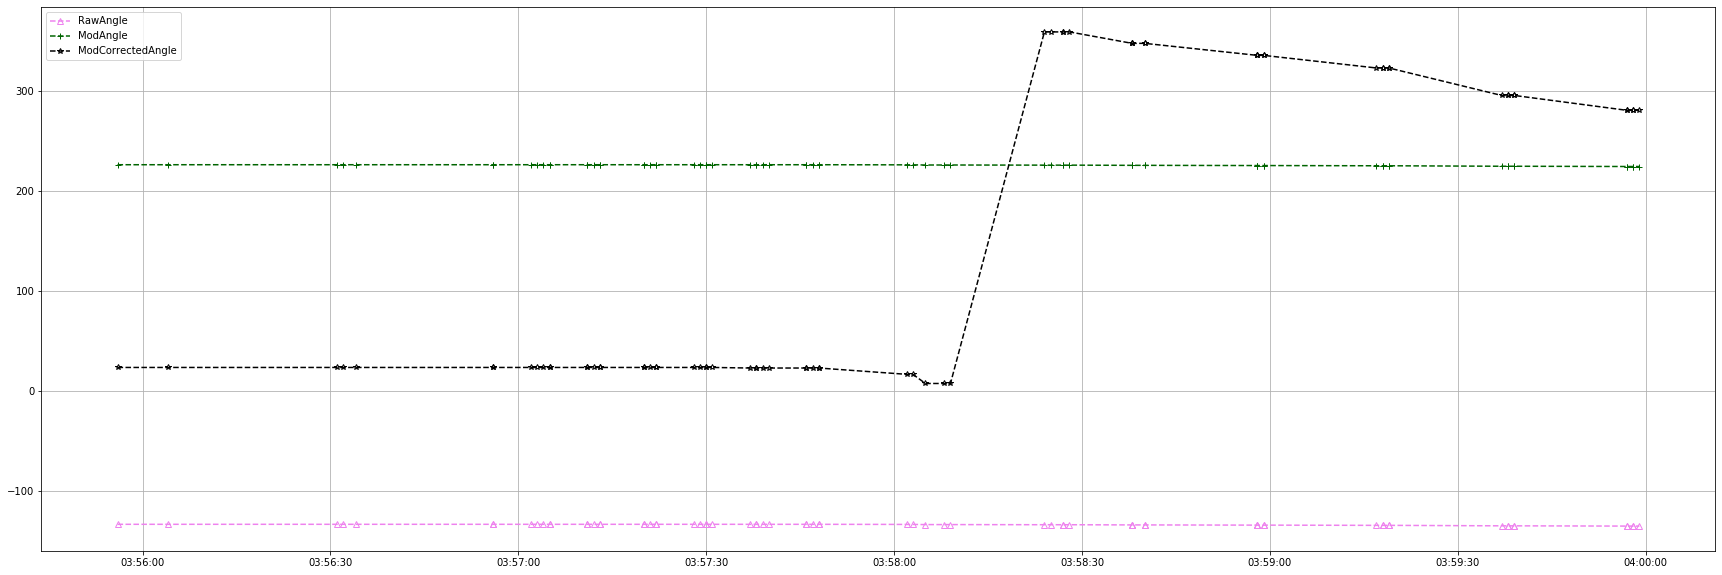

Month  1 Day  1 Hour 4


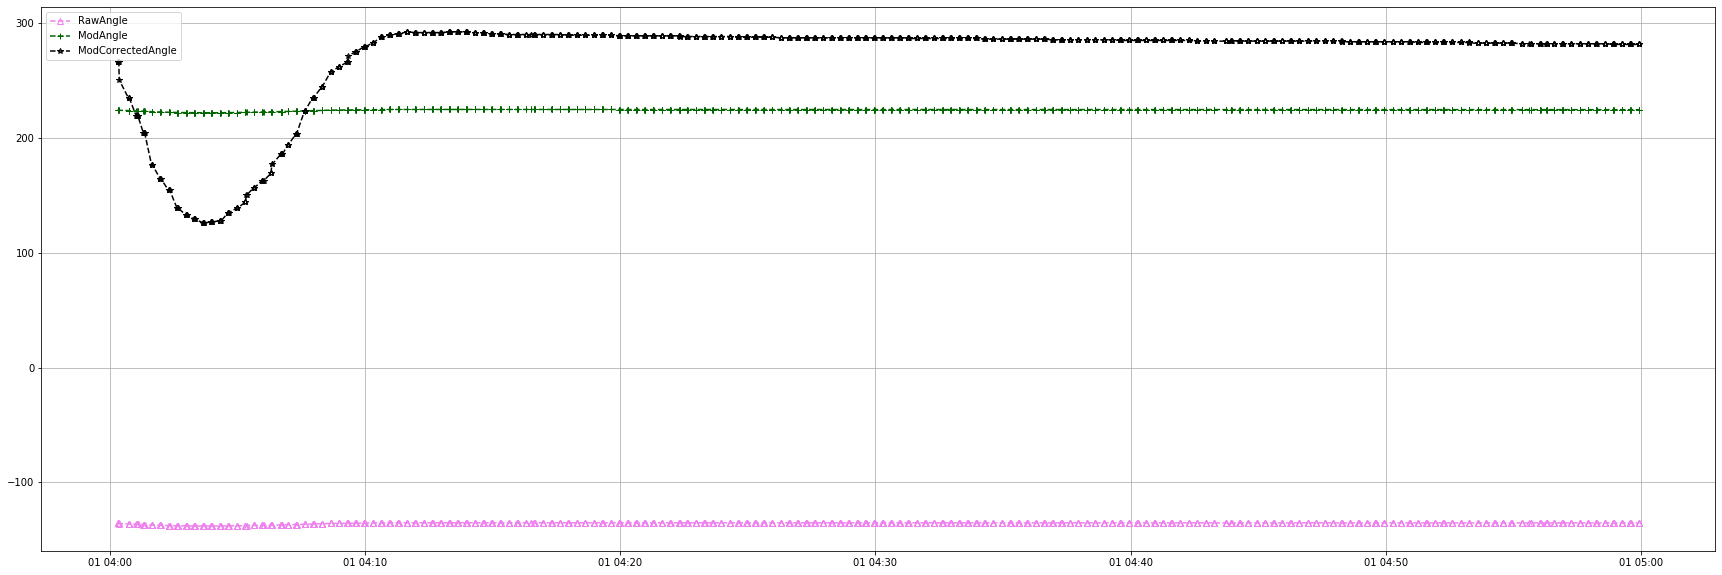

Month  1 Day  1 Hour 6


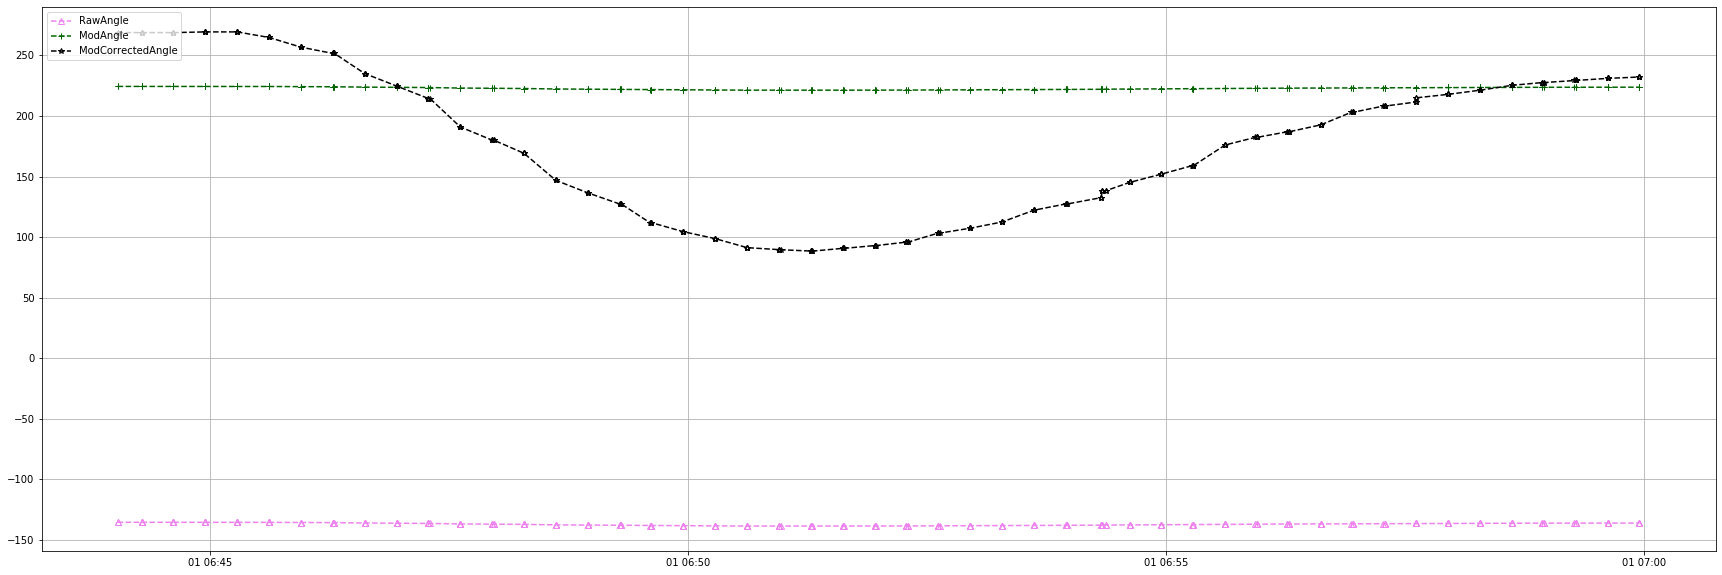

Month  1 Day  1 Hour 7


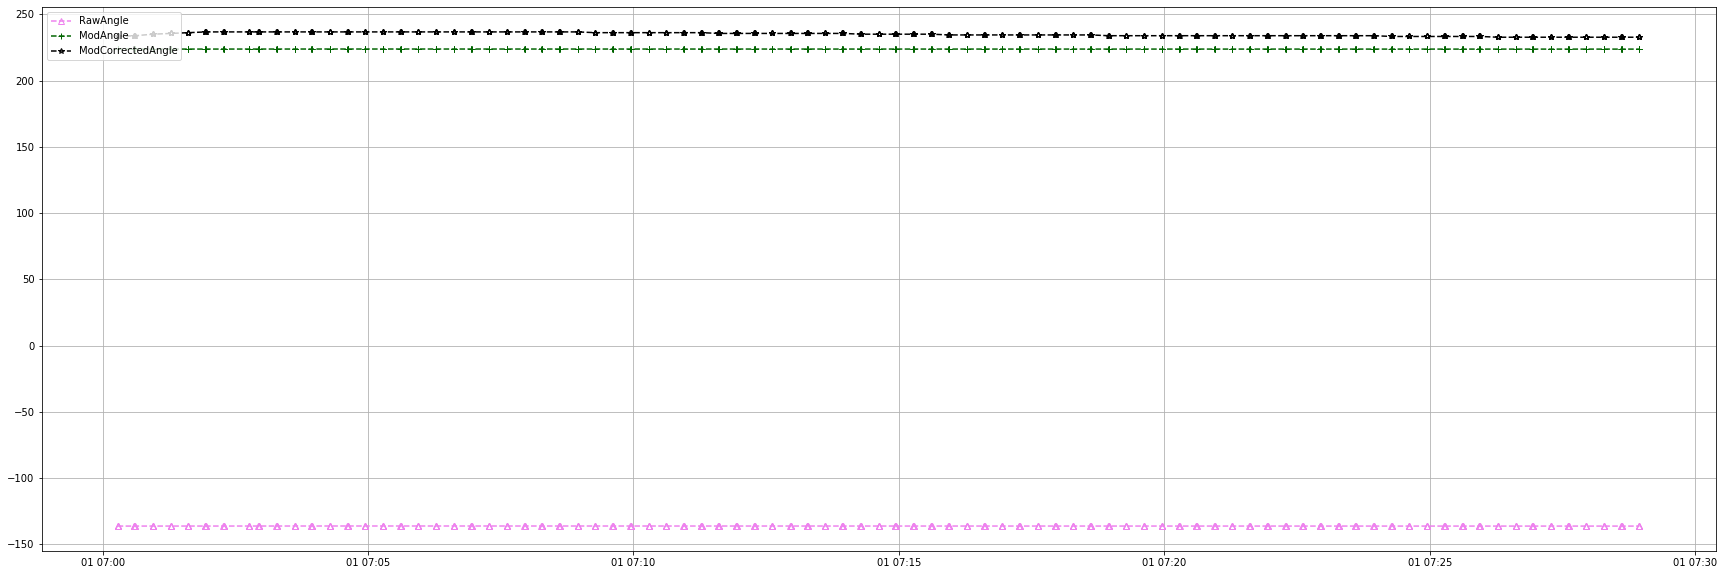

Month  1 Day  1 Hour 15


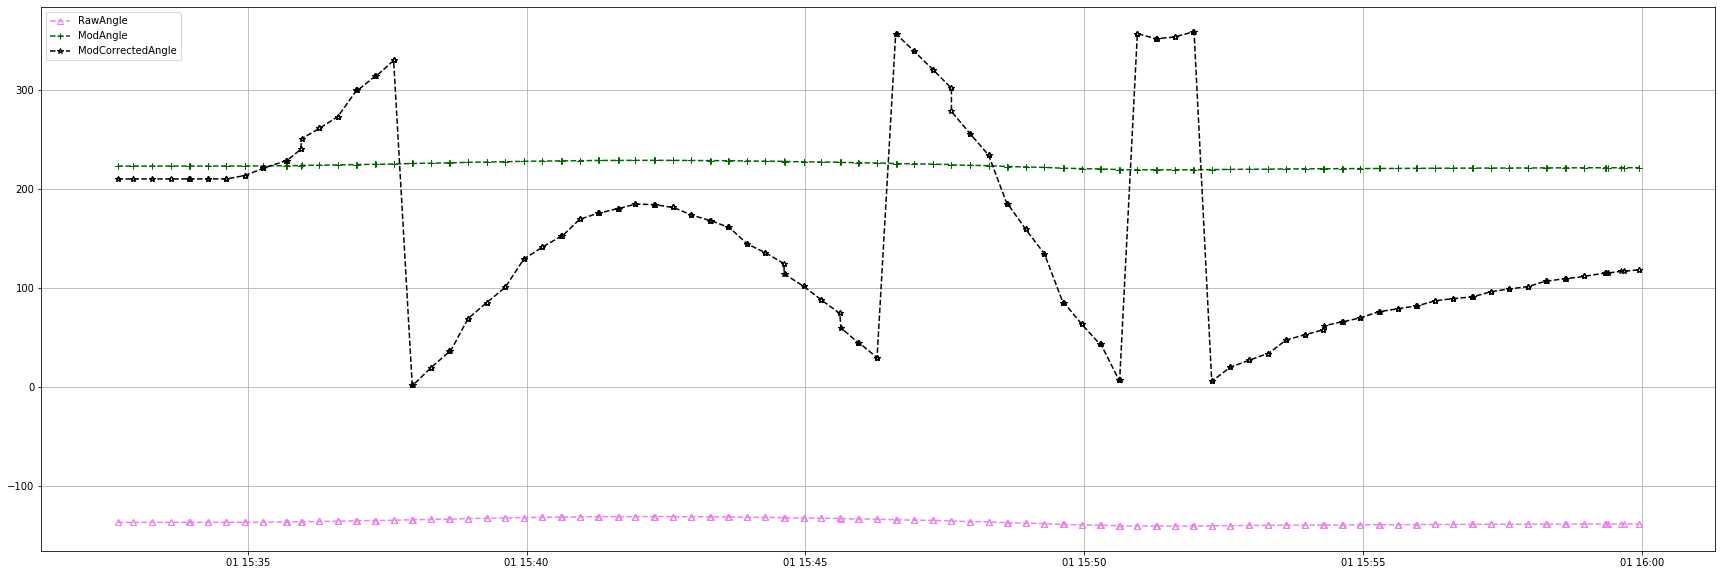

Month  1 Day  1 Hour 16


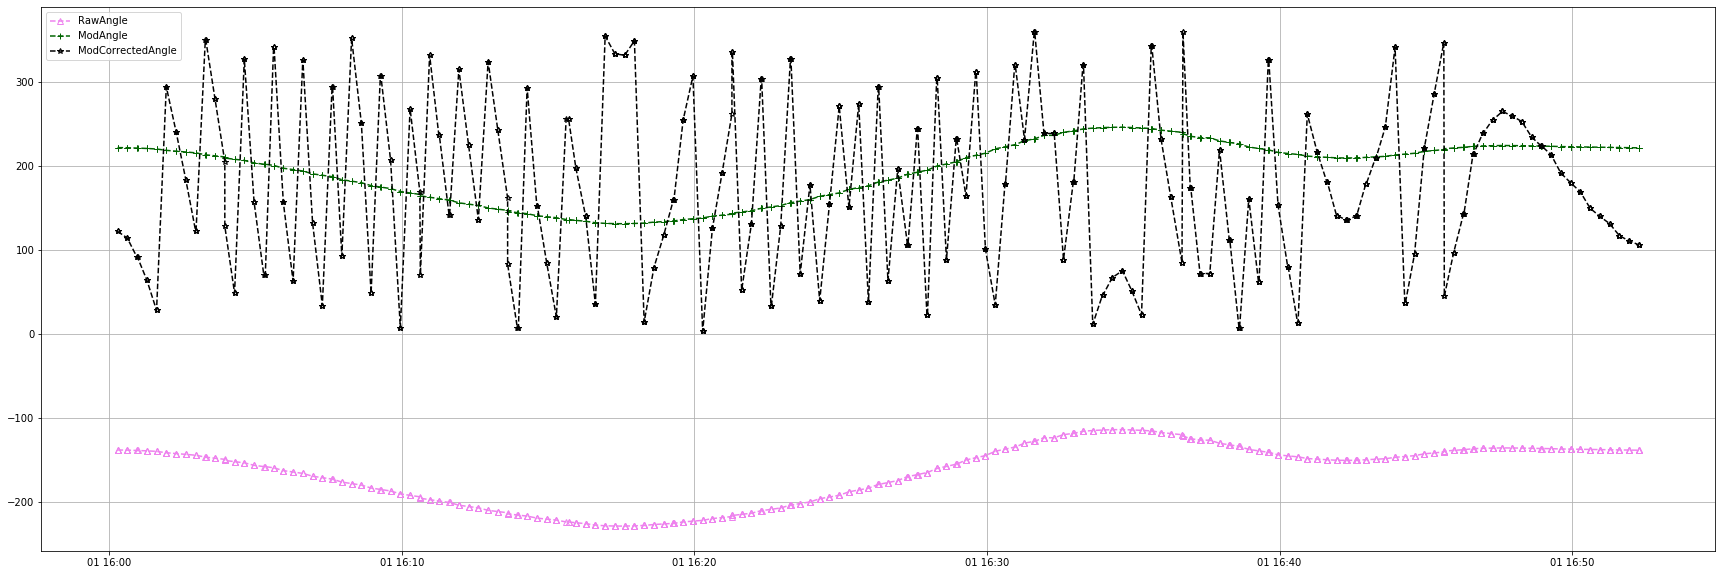

Month  1 Day  1 Hour 19


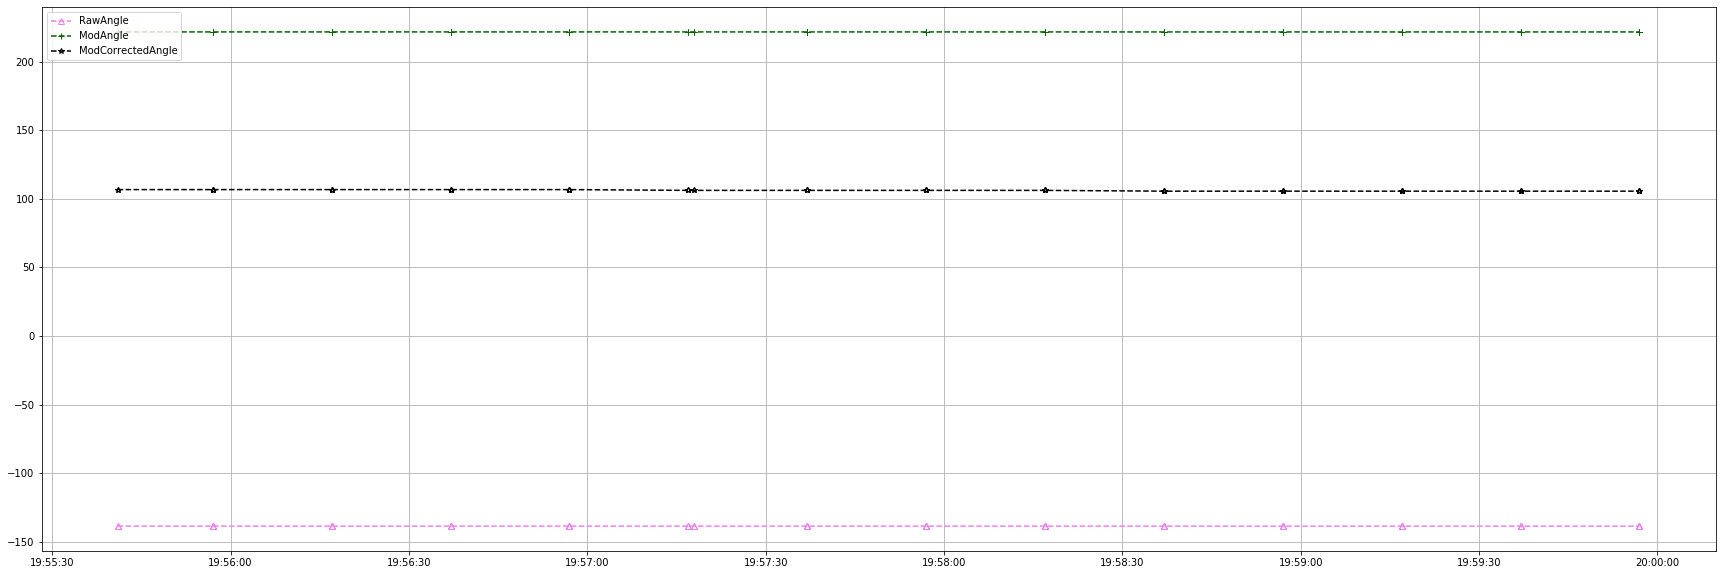

Month  1 Day  1 Hour 20


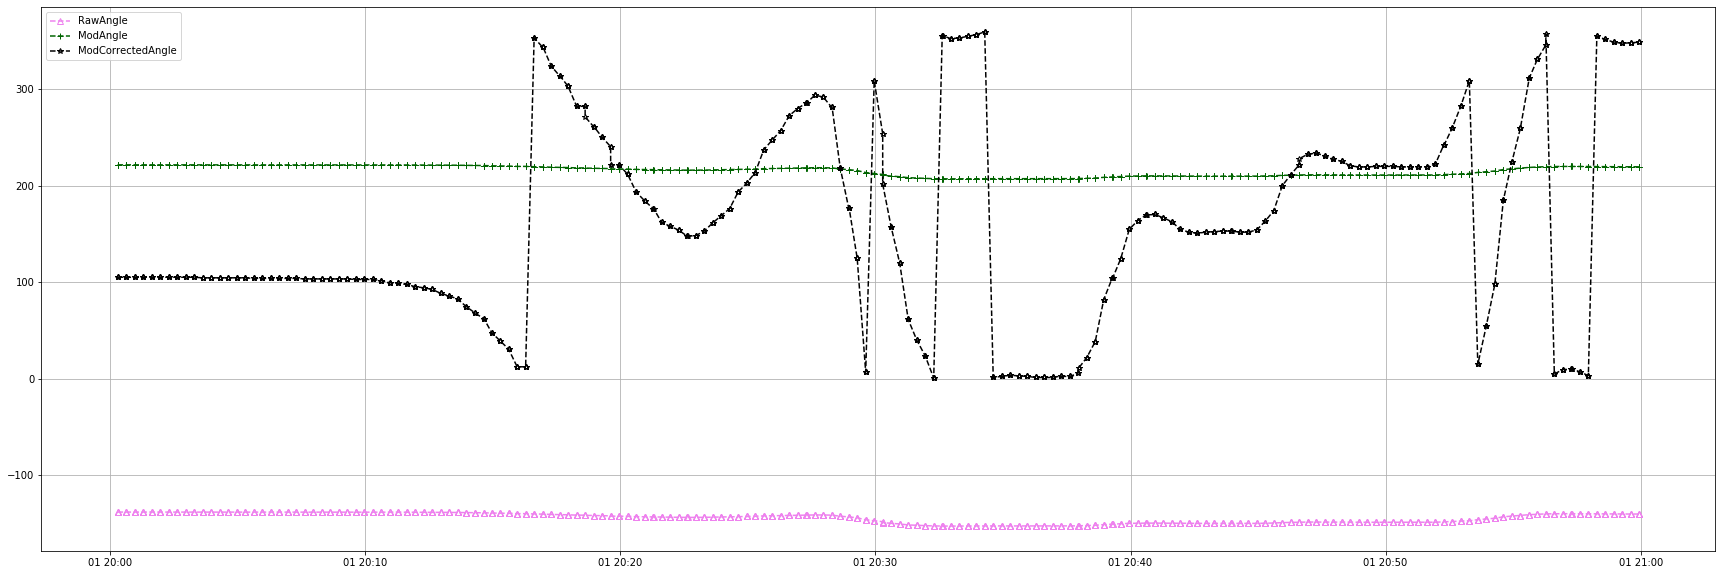

Month  1 Day  1 Hour 21


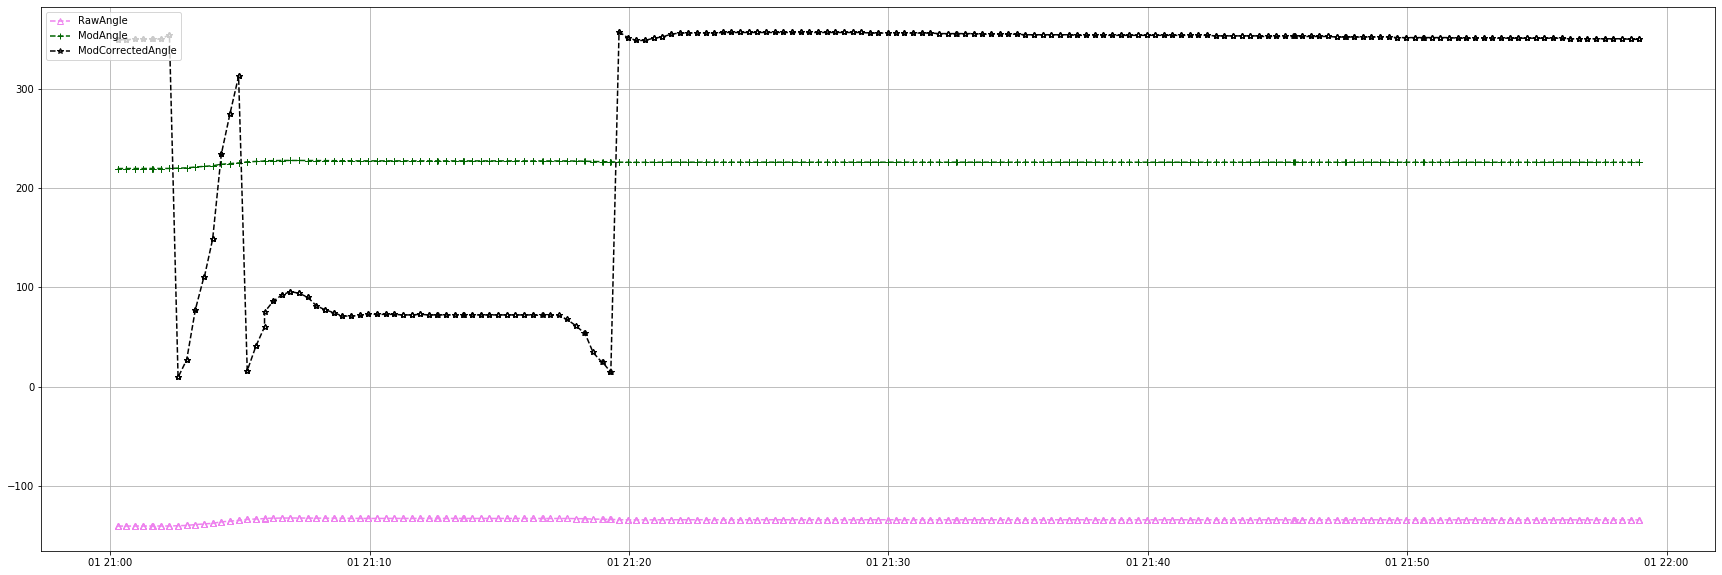

In [72]:
#labels=dfHourList[0].columns
for i in range(len(dfHourList)):
    fig=plt.figure(figsize=(30,10))
    ax=fig.add_subplot(111)
    for j in range(len(labeliz)):
        #print("Month ",dfHourList[i].index[0].month,"Day ",dfHourList[i].index[0].day,"Hour ",dfHourList[i].index[0].hour)
        ax.plot(dfHourList[i].index,dfHourList[i][labeliz[j]],c=colors[j],marker=markers[j],ls=linestyles[j],label=labeliz[j],fillstyle='none')
        plt.legend(loc="upper left") 
        plt.grid(True)
    title = print("Month ",dfHourList[i].index[0].month,"Day ",dfHourList[i].index[0].day,"Hour",dfHourList[i].index[0].hour)
    ax.set_title(title)
    plt.show()